In [24]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder,StandardScaler
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,classification_report,roc_curve,auc,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [25]:
# Reading CSV Files of Training and Testing Datasets
df=pd.read_excel("/content/Sampled-Unseen-KDD-Cup-99-Dataset.xlsx")

In [26]:
# Size of Unseen Dataset
df.shape

(14000, 4)

In [27]:
df.head()

,src_bytes,service,dst_bytes,attack
0,0,vmnet,0,Anomaly
1,0,private,0,Anomaly
2,254,http,7262,Normal
3,1256,smtp,329,Normal
4,0,private,0,Anomaly


In [28]:
# Load the Trained Model, Label Encoder and Scaler Objects
with open('/content/Trained-Model.pkl','rb') as model_file:
    model=pickle.load(model_file)
with open('/content/Scaler.sav','rb') as scaler_file:
    scaler=pickle.load(scaler_file)
with open('/content/Service-Label-Encoder.sav','rb') as encoder_file:
    encoder=pickle.load(encoder_file)

In [29]:
# Replace Categorical Coulmns to their Respective Encoded Values
df.replace({'Anomaly':0,'Normal':1},inplace=True)
df['service']=encoder.transform(df['service'])

In [30]:
# Seperate Target label from Data
x=df.drop(columns='attack')
y=df['attack']

In [32]:
# Standardizing the Features
x=scaler.transform(x)

In [33]:
# Accuracy
y_pred=model.predict(x)
print("Accuracy on Unseen Data :",accuracy_score(y,y_pred))

Accuracy on Unseen Data : 0.9840714285714286


[Text(0, 0.5, 'Anomaly'), Text(0, 1.5, 'Normal')]

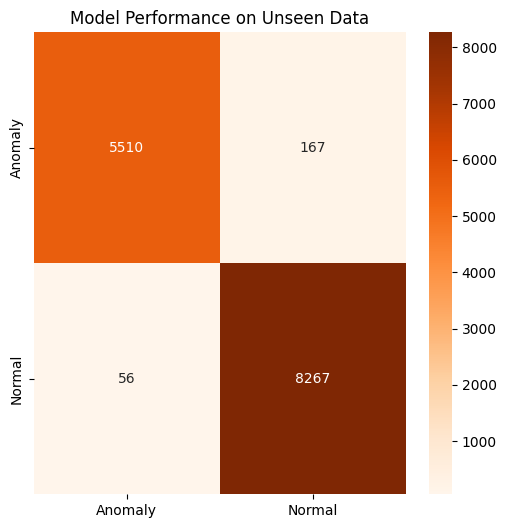

In [34]:
# Visualize Confusion Matrix
cm=confusion_matrix(y,y_pred)
plt.figure(figsize=(6,6))
plt.title("Model Performance on Unseen Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax=sns.heatmap(cm,annot=True,fmt="d",cmap="Oranges",cbar=True)
ax.set_xticks([0.5,1.5])
ax.set_yticks([0.5,1.5])
ax.set_xticklabels(['Anomaly','Normal'])
ax.set_yticklabels(['Anomaly','Normal'])